# Predict arrival delay with sklearn
# ----------------------------------------------

# Data loading

In [1]:
BASIC_PATH = '../Data/'
ALL_FILES = BASIC_PATH + '*.csv'

import pandas as pd
import numpy as np
import glob as glob

def readAllFiles():
    files = glob.glob(ALL_FILES)
    frames = []

    for file in files:
        df = pd.read_csv(file, index_col = 0)
        frames.append(df)

    return pd.concat(frames)

df = readAllFiles()

# Remove columns not necessary for machine learning

In [2]:
df['month'] = pd.to_datetime(df.date).map(lambda x: x.month)

In [3]:
df = df.drop(['date', 
              'airline_code', 
              'departure_airport', 
              'departure_lat', 
              'departure_lon', 
              'departure_schedule', 
              'arrival_airport', 
              'arrival_lat', 
              'arrival_lon', 
              'arrival_schedule', 
              'departure_actual', 
              'arrival_actual', 
              'arrival_tz', 
              'departure_tz'], axis=1)

In [4]:
df.columns

Index(['airline', 'departure_state', 'arrival_state', 'departure_delay',
       'arrival_delay', 'duration', 'distance', 'speed', 'month'],
      dtype='object')

# Split into test and train, split into x and y, use pandas.get_dummies

In [ ]:
from sklearn.model_selection import train_test_split
import gc

X = df.loc[:,['airline', 
              'departure_state', 
              'departure_delay',
              'distance', 
              'speed', 
              'month']]
X = pd.get_dummies(X, columns=['airline', 
                               'departure_state', 
                               'month'])
#TODO add arrival_state? => memory problem
#TODO add duration => not float problem

y = df.loc[:,['arrival_delay']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#make place in memory
del df
del X
del y
gc.collect()

# Random Forest Regressor model

### Make model

In [7]:
from sklearn.ensemble import RandomForestRegressor

rfrm = RandomForestRegressor()
rfrm.fit(X_train, y_train.values.ravel())

rfrm_y_predict = model.predict(X_test)

Mean squared error: 173.35
Variance score: 0.86952


### Test model

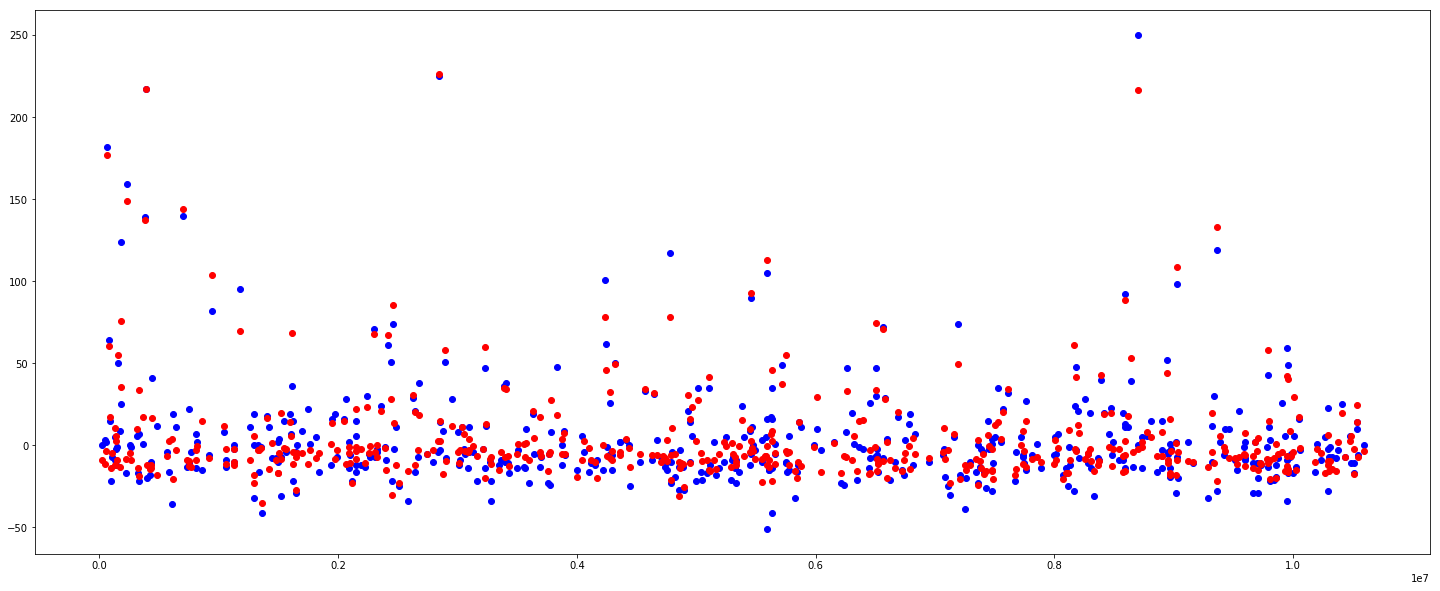

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, rfrm_y_predict))

# The mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, rfrm_y_predict))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.5f' % r2_score(y_test, rfrm_y_predict))

#Graph
plt.scatter(y_test.iloc[:500,:].index, y_test.iloc[:500,:].arrival_delay, c='b')
predictDf = pd.DataFrame( data=rfrm_y_predict, index=y_test.index)
plt.scatter(predictDf.iloc[:500,:].index, predictDf.iloc[:500,0], c='r')
plt.rcParams['figure.figsize'] = [30, 10]
plt.show()

# Linear regression model

In [15]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
enc = LabelEncoder();

X = df.loc[:,['date', 'airline', 'departure_airport', 'arrival_airport']]
X.date = enc.fit_transform(X.date)
X.airline = enc.fit_transform(X.airline)
X.departure_airport = enc.fit_transform(X.departure_airport)
X.arrival_airport = enc.fit_transform(X.arrival_airport)

y = df.loc[:,['arrival_delay']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

# The coefficients
print('Coefficients: \n', model.coef_)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_predict))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.5f' % r2_score(y_test, y_predict))

Coefficients: 
 [[ 0.00203808 -0.10865095  0.01613986]]
Mean squared error: 1328.77
Variance score: 0.00086


### Make model

### Test model

In [14]:
from sklearn.linear_model import LinearRegression

lrm = LinearRegression()
lrm.fit(X_train, y_train.values.ravel())

lrm_y_predict = lrm.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, lrm_y_predict))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.5f' % r2_score(y_test, lrm_y_predict))

MemoryError: 

# Ridge Regression model

### Make model

In [ ]:
from sklearn.linear_model import Ridge

rrm = Ridge(alpha=0.3,normalize=True)
rrm.fit(X_train, y_train.values.ravel())

rrm_y_predict = rrm.predict(X_test)

### Test model

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, rrm_y_predict))

# The mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, rrm_y_predict))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.5f' % r2_score(y_test, rrm_y_predict))

# TEST Classificatie

In [12]:
from sklearn import datasets
from sklearn import cross_validation
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
enc = LabelEncoder();

X = df.loc[:,['date', 'airline', 'departure_airport', 'arrival_airport']]
X.date = enc.fit_transform(X.date)
X.airline = enc.fit_transform(X.airline)
X.departure_airport = enc.fit_transform(X.departure_airport)
X.arrival_airport = enc.fit_transform(X.arrival_airport)

y = df.loc[:,['arrival_delay']]

X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), random_state=0)
    
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(y_pred)
print(y_test)

accuracy = metrics.accuracy_score(y_test, y_pred)

print(accuracy)


ValueError: Unknown label type: (array([ -139.,  -115.,   -94., ...,  1623.,  1666.,  1823.]),)